In [506]:
import pandas as pd

def auto_graphing_xy(file_name,separation,columns,graph_columns): #[a,b,c,d]
    data1 = pd.read_csv(file_name, sep=separation, header=None)
    data1.columns = columns
    #print(data1)

    x_labeling = [columns[0],graph_columns[0]]
    y_labeling = [columns[1],graph_columns[1]]
    
    print(x_labeling, y_labeling)
    print(x_labeling[0], y_labeling[0])
    
    graph1 = data1.plot(x = x_labeling[0], y= y_labeling[0], kind = 'scatter')
    graph1.set_xlabel(x_labeling[1])
    graph1.set_ylabel(y_labeling[1])
    #graph1.set_xlim(a,b)
    #graph1.set_xlim(c,d)
    return graph1
def txt_to_pandas(file_name, separation):
    data2 = pd.read_csv(file_name, sep=separation, header=None)
    data_final = data2[:-1]
    data_final_input = pd.DataFrame()
    data_final_input[0] = data_final[0].astype(float)
    data_final_input[1] = data_final[1].astype(float)
    return data_final_input
def graph_from_pandas(data, x_labeling,y_labeling): # a,b,c,d
    graph1 = data.plot(x = x_labeling[0], y= y_labeling[0], kind = 'scatter')
    graph1.set_xlabel(x_labeling[1])
    graph1.set_ylabel(y_labeling[1])
    # graph1.set_xlim(a,b)
    # graph1.set_ylim(c,d)    
    return graph1
def remove_outlier(data,remove_outliers):
    data_copy_000 = data.copy()
    data_outlier_000 = data[data[1] >= remove_outliers]
    outliers_000 = list(data_outlier_000.index)
    print(len(outliers_000), outliers_000) 
    return outliers_000, data_outlier_000    
def clean_graph(data,outlier):
    data_copy_1 = data.copy()
    data_1_clean = data_copy_1.drop(outlier)
    print('Max',data_1_clean[data_1_clean[1] == data_1_clean[1].max()])
    return graph_from_pandas(data_1_clean, [0,"Wavelength"], [1,"Intensity"])
def fitting_exp_function(x,y):
    # Curve Fitting Library
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit 
    from sklearn.metrics import mean_squared_error

    def linear_model(x,m,b):
        return m * x + b
    def sin_test(x, a, b, d): 
        return a * np.sin(b * x) + d
    def exp_test(x, a, b, c): 
        return a * np.exp(b*x) + c 

    param, param_cov = curve_fit(exp_test, x, y) 
    ans = exp_test(x, *param) # (param[0] * x + param[1]) 

    print('MSE: ' , mean_squared_error(y, ans))
    print("Function coefficients:", param) 
    print("Covariance of coefficients:") 
    print(param_cov) 

    plt.plot(x, y, 'o', color ='red', label ="data") 
    plt.plot(x, ans, '--', color ='blue', label ="optimized data") 
    plt.legend() 
    plt.show() 

1. graph1 : device1_IV_IV_Sample-A-1_IV_Sample-A-1.txt
2. graph2 : device1_IV_IV_Sample-A-1_IV_Sample-A-2.txt
3. graph3 : device1_IV_IV_Sample-A-1_IV_Sample-A-3.txt
4. graph4 : device1_IV_IV_Sample-A-1_IV_Sample-A-4.txt
5. graph5 : device1_IV_IV_Sample-A-1_IV_Sample-AA-1.txt
6. graph6 : device1_IV_IV_Sample-A-1_IV_Sample-AA-2.txt

['I', 'Current'] ['V', 'Voltage']
I V


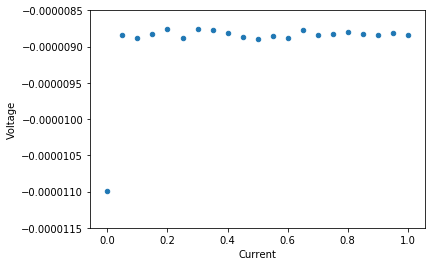

In [589]:
graph1 = auto_graphing_xy('device1_IV_IV_Sample-A-1_IV_Sample-A-1.txt',"\t",["I","V"],["Current","Voltage"]) #a,b = -0.0001/6, 0
graph1.set_ylim([-0.0000115,-0.0000085])
graph1

['I', 'Current'] ['V', 'Voltage']
I V


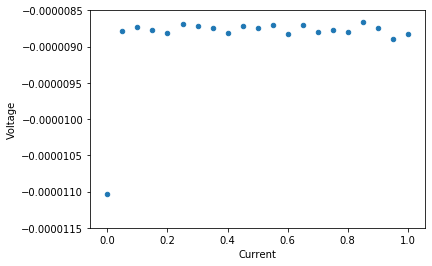

In [587]:
graph2 = auto_graphing_xy('device1_IV_IV_Sample-A-1_IV_Sample-A-2.txt',"\t",["I","V"],["Current","Voltage"])
graph2.set_ylim([-0.0000115,-0.0000085])
graph2

['I', 'Current'] ['V', 'Voltage']
I V
MSE:  1.2356788106388823
Function coefficients: [ 0.04171567  2.04624557 -0.69022906]
Covariance of coefficients:
[[ 0.00013497 -0.00104434 -0.0017228 ]
 [-0.00104434  0.00812285  0.0127968 ]
 [-0.0017228   0.0127968   0.04864071]]


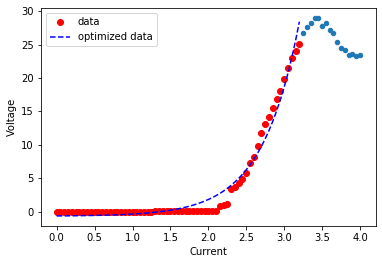

In [573]:
graph3 = auto_graphing_xy('device1_IV_IV_Sample-A-1_IV_Sample-A-3.txt',"\t",["I","V"],["Current","Voltage"]) #a,b = -0.0001/6, 0
data0 = txt_to_pandas('device1_IV_IV_Sample-A-1_IV_Sample-A-3.txt',"\t")

d01 = data0[data0[1] == data0[1].max()]
y, red = d01[1].index[0], 4

x0, y0 = data0[0][:y-red], data0[1][:y-red]
fitting_exp_function(x0,y0)

In [510]:
#data0[1].max()
#d01 = data0[data0[1] == data0[1].max()]
#x,y = d01[0],d01[1]
#d01[1].index[0]
#data0[1][:y.index[0]]

28.93031

['I', 'Current'] ['V', 'Voltage']
I V
MSE:  1.159024814954026
Function coefficients: [ 0.98166749  0.60390354 -1.6843171 ]
Covariance of coefficients:
[[ 0.0058322  -0.00093083 -0.01631837]
 [-0.00093083  0.00015001  0.00251657]
 [-0.01631837  0.00251657  0.06010574]]


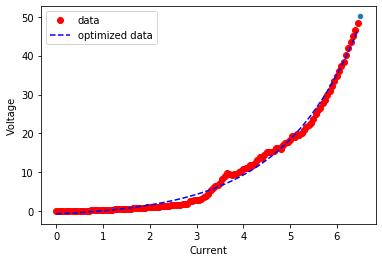

In [516]:
graph4 = auto_graphing_xy('device1_IV_IV_Sample-A-1_IV_Sample-A-4.txt',"\t",["I","V"],["Current","Voltage"]) #a,b = -0.0001/6, 0
data1 = txt_to_pandas('device1_IV_IV_Sample-A-1_IV_Sample-A-4.txt',"\t")
x1, y1 = data1[0], data1[1]
fitting_exp_function(x1,y1)

In [517]:
data1[data1[0] == data1[0].max()][0].index[0]

129

device1_IV_IV_Sample-A-1_IV_Sample-AA-(1-2)

['I', 'Current'] ['V', 'Voltage']
I V
MSE:  1.8644141790341713
Function coefficients: [ 1.77905792  0.53572879 -3.62355788]
Covariance of coefficients:
[[ 8.41565627e-03 -6.08626732e-04 -2.78030629e-02]
 [-6.08626732e-04  4.44174435e-05  1.93877894e-03]
 [-2.78030629e-02  1.93877894e-03  1.28977402e-01]]


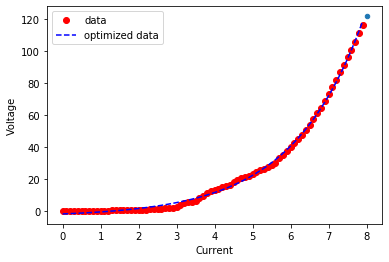

In [518]:
graph5 = auto_graphing_xy('device1_IV_IV_Sample-A-1_IV_Sample-AA-1.txt',"\t",["I","V"],["Current","Voltage"]) #a,b = -0.0001/6, 0
data2 = txt_to_pandas('device1_IV_IV_Sample-A-1_IV_Sample-AA-1.txt',"\t")
x2, y2 = data2[0], data2[1]
fitting_exp_function(x2,y2)

['I', 'Voltage'] ['V', 'Current']
I V
MSE:  22.732470637675664
Function coefficients: [  5.6394503    0.38590829 -12.05487545]
Covariance of coefficients:
[[ 1.69403893e-01 -3.05722910e-03 -4.58093915e-01]
 [-3.05722910e-03  5.57205510e-05  7.99162758e-03]
 [-4.58093915e-01  7.99162758e-03  1.61200736e+00]]


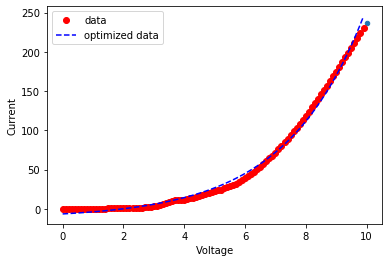

In [519]:
graph6 = auto_graphing_xy('device1_IV_IV_Sample-A-1_IV_Sample-AA-2.txt',"\t",["I","V"],["Voltage","Current"]) #a,b = -0.0001/6, 0
data3 = txt_to_pandas('device1_IV_IV_Sample-A-1_IV_Sample-AA-2.txt',"\t")
x3, y3 = data3[0], data3[1]
fitting_exp_function(x3,y3)

EL Sample
1. graph7  : EL_sample_1_4.2V-Duplicate.txt
2. graph8  : EL_sample_1_6V-Duplicate.txt
3. graph9  : EL_sample_1_10V-Duplicate.txt
4. graph10 : EL_sample_2_10V-Duplicate.txt
---------------------------------------------------------
1. oled el_1-Duplicate.txt
2. device1_IV_IV_Sample-A-1_results.txt
3. IV_Sample_2-measurement_1.txt
4. IV_Sample_2-measurement_1.txt

graph7 

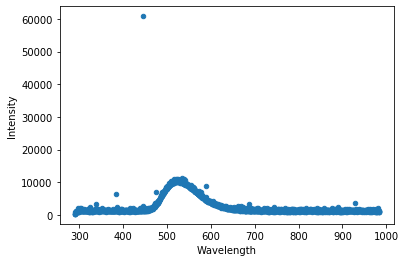

In [520]:
data_final_input = txt_to_pandas('EL_sample_1_4.2V-Duplicate.txt', "\t")
graph7 = graph_from_pandas(data_final_input, [0,"Wavelength"], [1,"Intensity"]) # a,b,c,d = 450,650,0,15000
graph7

In [521]:
outliers, data_outlier = remove_outlier(data_final_input,10880)
data_outlier

6 [416, 611, 625, 633, 660, 678]


,0,1
416,445.08,60790.73
611,515.77,11077.76
625,520.79,11096.48
633,523.65,11009.88
660,533.29,11295.43
678,539.71,10888.17


Max           0         1
638  525.44  10874.13


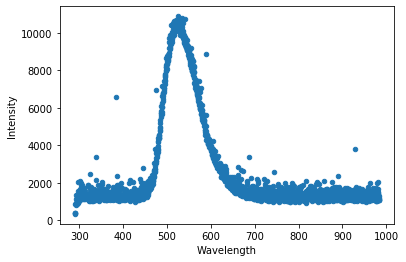

In [522]:
clean_graph(data_final_input,outliers)

graph8

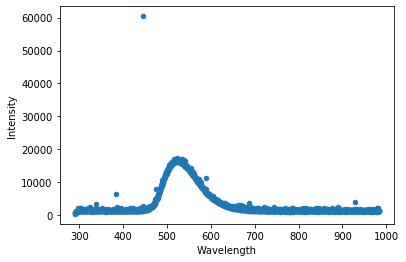

In [523]:
data_final_input_000 = txt_to_pandas('EL_sample_1_6V-Duplicate.txt', "\t")
graph8 = graph_from_pandas(data_final_input_000, [0,"Wavelength"], [1,"Intensity"]) # a,b,c,d = 450,650,0,15000
graph8

In [524]:
outliers_000, data_outlier_000 = remove_outlier(data_final_input_000,20000)
data_outlier_000

1 [416]


,0,1
416,445.08,60427.95


Max           0         1
633  523.65  17345.71


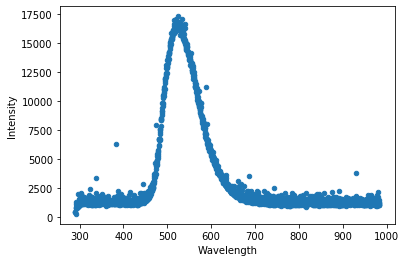

In [525]:
clean_graph(data_final_input_000,outliers_000)

graph9

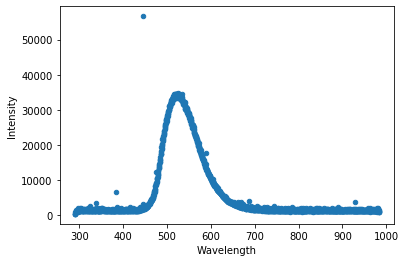

In [568]:
data_final_input_10V = txt_to_pandas('EL_sample_1_10V-Duplicate.txt', "\t")
graph9 = graph_from_pandas(data_final_input_10V , [0,"Wavelength"], [1,"Intensity"]) # a,b,c,d = 450,650,0,15000
graph9

In [569]:
outliers_10V, data_outlier_10V = remove_outlier(data_final_input_10V,37000)
data_outlier_10V

1 [416]


,0,1
416,445.08,56676.07


Max           0         1
634  524.01  34906.75


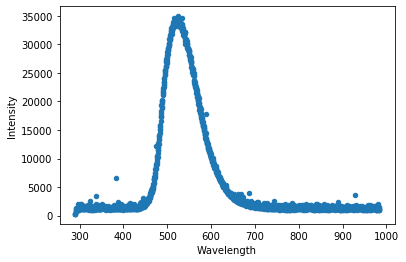

In [570]:
clean_graph(data_final_input_10V,outliers_10V)

graph10

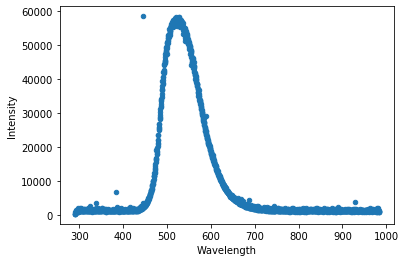

In [560]:
data_final_input_020 = txt_to_pandas('EL_sample_2_10V-Duplicate.txt', "\t")
graph10 = graph_from_pandas(data_final_input_020, [0,"Wavelength"], [1,"Intensity"]) # a,b,c,d = 450,650,0,15000
graph10

In [562]:
outliers_020, data_outlier_020 = remove_outlier(data_final_input_020,58350)
data_outlier_020

1 [416]


,0,1
416,445.08,58363.6


Max           0         1
641  526.51  58251.25


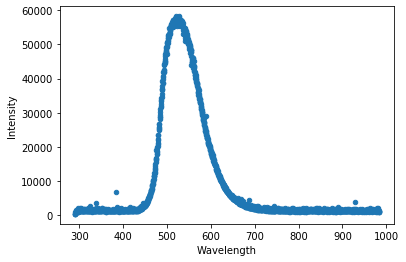

In [563]:
clean_graph(data_final_input_020,outliers_020)

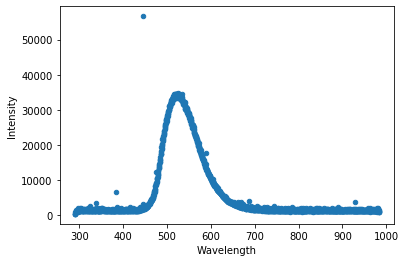

In [532]:
data_final_input5 = txt_to_pandas('oled el_1-Duplicate.txt', "\t")
graph14 = graph_from_pandas(data_final_input, [0,"Wavelength"], [1,"Intensity"])
graph13

In [533]:
outliers5, data_outlier5 = remove_outlier(data_final_input5,6000)
data_outlier5

1 [416]


,0,1
416,445.08,49380.62


Max           0         1
641  526.51  58251.25


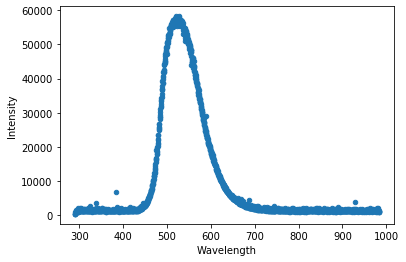

In [564]:
clean_graph(data_final_input_020,outliers_020)

-

In [534]:
data_final_input_10 = pd.read_csv('device1_IV_IV_Sample-A-1_results.txt', sep="\t")
data_final_input_10

,Sample,OC Volt (V),SC Current (A),Fill Factor,Efficiency,Vmax (V),Imax (A),Pmax (W),Irradiance (W/cm2)
0,Sample-AA_1,0.001243,0.000096,8.159860e+09,108.357900,8.000298,121.898100,975.221000,900.0
1,Sample-AA_2,0.001296,0.000143,1.281039e+10,263.314900,10.000240,236.977800,2369.835000,900.0
2,Sample-2_1,13.675290,0.000011,2.979046e-01,0.000005,9.600000,0.000005,0.000047,900.0
3,Sample-2_2,0.001310,0.000675,4.228444e+09,415.361700,10.000000,373.825500,3738.255000,900.0


In [545]:
data_final_input_11 = pd.read_csv('IV_Sample_2-measurement_1.txt', sep="\t", header=None)
data_final_input_12 = pd.read_csv('IV_Sample_2-measurement_2.txt', sep="\t", header=None)

In [546]:
data_final_input_11

,0,1
0,0.0,-0.000011
1,0.1,-0.000009
2,0.2,-0.000009
3,0.3,-0.000009
4,0.4,-0.000009
...,...,...
96,9.6,-0.000005
97,9.7,-0.000005
98,9.8,-0.000004
99,9.9,-0.000003


In [544]:
data_final_input_11[1].min(), data_final_input_11[1].max()

(-1.1487539999999999e-05, -3.422141e-06)

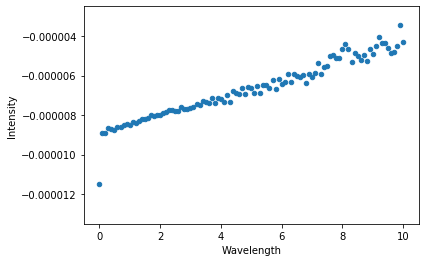

In [596]:
graph15 = graph_from_pandas(data_final_input_11, [0,"Wavelength"], [1,"Intensity"])
graph15.set_ylim([-0.0000135,-0.0000025])
graph15

MSE:  141.53203784422658
Function coefficients: [ 11.8723484    0.35921744 -26.37910528]
Covariance of coefficients:
[[ 1.57287642e+00 -1.32503768e-02 -3.83200154e+00]
 [-1.32503768e-02  1.12778357e-04  3.12576872e-02]
 [-3.83200154e+00  3.12576872e-02  1.16897510e+01]]


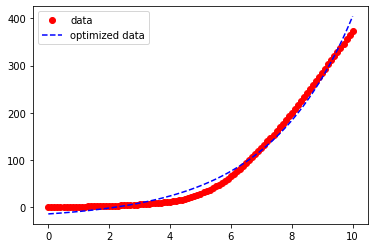

In [537]:
x = data_final_input_12[0]#[data_start:]
y = data_final_input_12[1]#[data_start:]
fitting_exp_function(x,y)

Curve Fitting Example

Sine funcion coefficients:
[ 3.63697293  1.34384084 -0.09042784]
Covariance of coefficients:
[[ 6.02492750e-02 -7.05300642e-05 -1.96378157e-03]
 [-7.05300642e-05  1.19989278e-04 -2.64132541e-04]
 [-1.96378157e-03 -2.64132541e-04  2.93411075e-02]]


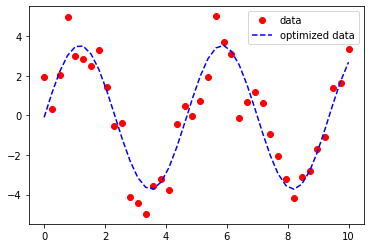

In [538]:
from scipy.optimize import curve_fit 
x = np.linspace(0, 10, num = 40) 
y = 3.45 * np.sin(1.334 * x) + np.random.normal(size = 40) 

def sin_test(x, a, b, d): 
    return a * np.sin(b * x) + d
param, param_cov = curve_fit(test, x, y) 
  
print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
ans = sin_test(x, *param) # (param[0]*(np.sin(param[1]*x))) 

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', color ='red', label ="data") 
plt.plot(x, ans, '--', color ='blue', label ="optimized data") 
plt.legend() 
plt.show() 

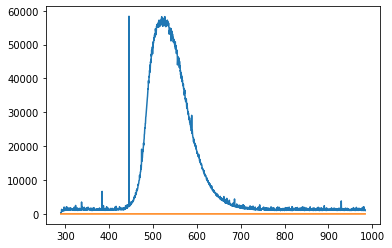

In [539]:
# built-in modelling
import numpy as np
from astropy import modeling

x = data_final_input_020[0]
y = data_final_input_020[1]

fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, y)

plt.plot(x, y)
plt.plot(x, fitted_model(x))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


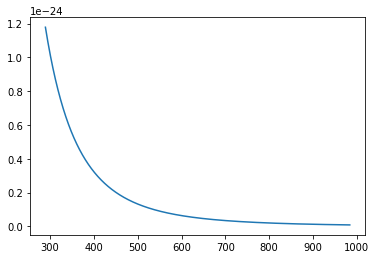

In [540]:
from scipy.constants import h,k,c
from scipy.optimize import curve_fit
import numpy as np
import scipy as sp

def Plancks_Law(lamb, T):
    alpha = 2*h*c*c
    beta = h*c/k
    return alpha/np.power(lamb,5.0) * 1/( np.exp( beta/(lamb*T)) - 1 )

x = data_1_clean[0]
y = data_1_clean[1]

# p0_R = (500.) 
optR, pcovR = curve_fit(Plancks_Law, x, y)
T_R = optR
T_Rp = pcovR
yM = Plancks_Law(x, T_R)
yM, x

import matplotlib.pyplot as plt
plt.plot(x, yM)

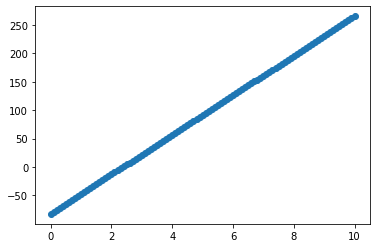

In [541]:
import scipy

def linear_model(x,m,b):
    return m*x+b
init_guess = [4,20]
fit = curve_fit(linear_model, data_final_input_12[0], data_final_input_12[1])
ans, cov = fit
fit_m, fit_b = ans
#errorbar(data_final_input_12[0], data_final_input_12[1]) 
x = data_final_input_12[0]
y_pred = linear_model(x,*ans)

plt.scatter(x,fit_m*x+fit_b)